# Realization of Recursive Filters

*This jupyter/Python notebook is part of a [collection of notebooks](../index.ipynb) in the masters module [Digital Signal Processing](http://www.int.uni-rostock.de/Digitale-Signalverarbeitung.48.0.html), Comunications Engineering, Universität Rostock. Please direct questions and suggestions to <mailto:Sascha.Spors@uni-rostock.de>.*

## Introduction

Computing the output $y[k] = \mathcal{H} \{ x[k] \}$ of a [linear time-invariant](https://en.wikipedia.org/wiki/LTI_system_theory) (LTI) system is of central importance in digital signal processing. This is often referred to as [*filtering*](https://en.wikipedia.org/wiki/Digital_filter) of the input signal $x[k]$. We already have discussed the realization of [non-recursive filters](../nonrecursive_filters/introduction.ipynb). This section focuses on the realization of recursive filters.

### Recursive Filters

Linear difference equations with constant coefficients represent linear-time invariant (LTI) systems

$$ \sum_{n=0}^{N} a_n \; y[k-n] = \sum_{m=0}^{M} b_m \; x[k-m] $$

where $y[k] = \mathcal{H} \{ x[k] \}$ denotes the response of the system to the input signal $x[k]$, $N$ the order, $a_n$ and $b_m$ constant coefficients, respectively. Above equation can be rearranged with respect to the output signal $y[k]$ by extracting the first element ($n=0$) of the left hand sum

$$ y[k] = \frac{1}{a_0} \left( \sum_{m=0}^{M} b_m \; x[k-m] - \sum_{n=1}^{N} a_n \; y[k-n] \right) $$

It is evident that the output signal $y[k]$ at time instant $k$ is given as a linear combination of past output samples $y[k-n]$ superimposed by a linear combination of the actual $x[k]$ and past $x[k-m]$ input samples. Hence, the actual output $y[k]$ is composed from the two contributions

1. a [non-recursive part](../nonrecursive_filters/introduction.ipynb#Non-Recursive-Filters), and
2. a recursive part where a linear combination of past output samples is fed back.

The impulse response of the system is given as the response of the system to a Dirac impulse at the input $h[k] = \mathcal{H} \{ \delta[k] \}$. Using above result and the properties of the discrete Dirac impulse we get

$$ h[k] = \frac{1}{a_0} \left( b_k  - \sum_{n=1}^{N} a_n \; h[k-n] \right) $$

Due to the feedback, the impulse response will in general be of infinite length. The impulse response is termed as [infinite impulse response](https://en.wikipedia.org/wiki/Infinite_impulse_response) (IIR) and the system as recursive system/filter.

### Transfer Function

Applying a $z$-transform to the left and right hand side of the difference equation and rearranging terms yields the transfer function $H(z)$ of the system

$$ H(z) = \frac{Y(z)}{X(z)} = \frac{\sum_{m=0}^{M} b_m \; z^{-m}}{\sum_{n=0}^{N} a_n \; z^{-n}} $$

The transfer function is given as a [rational function](https://en.wikipedia.org/wiki/Rational_function) in $z$. The polynominals of the numerator and denominator can expressed alternatively by their roots as

$$ H(z) = \frac{b_M}{a_N} \cdot \frac{\prod_{\mu=1}^{P} (z - z_{0\mu})^{m_\mu}}{\prod_{\nu=1}^{Q} (z - z_{\infty\nu})^{n_\nu}} $$

where $z_{0\mu}$ and $z_{\infty\nu}$ denote the $\mu$-th zero and $\nu$-th pole of degree $m_\mu$ and $n_\nu$ of $H(z)$, respectively. The total number of zeros and poles is denoted by $P$ and $Q$. Due to the symmetries of the $z$-transform, the transfer function of a real-valued system $h[k] \in \mathbb{R}$ exhibits complex conjugate symmetry

$$ H(z) = H^*(z^*) $$

Poles and zeros are either real valued or conjugate complex pairs for real-valued systems ($b_m\in\mathbb{R}$, $a_n\in\mathbb{R}$). For the poles of a causal and stable system $H(z)$ the following condition has to hold

$$ \max_{\nu} | z_{\infty\nu} | < 1 $$

Hence all poles have to be located inside the unit circle $|z| = 1$. Amongst others, this implies that $M \leq N$.

### Example

The following example shows the pole/zero diagram, the magnitude and phase response, and impulse response of a recursive filter with so called [Butterworth](https://en.wikipedia.org/wiki/Butterworth_filter) lowpass characteristic.

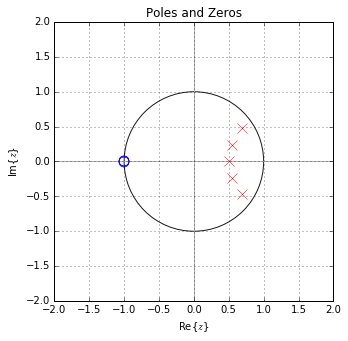

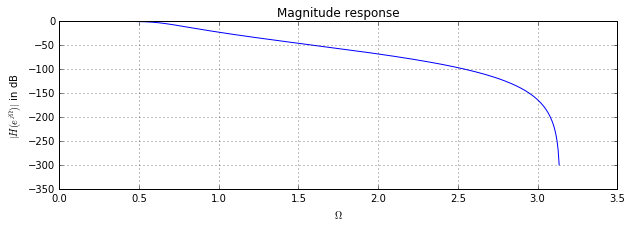

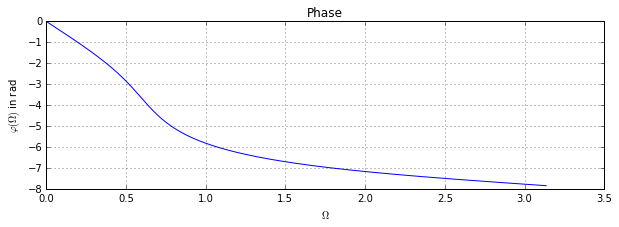

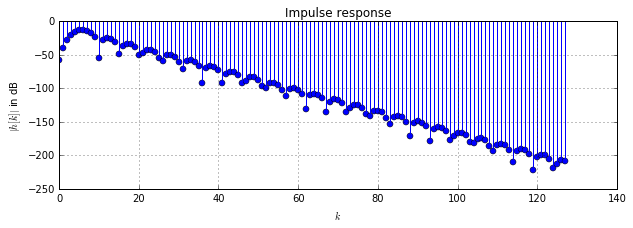

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.markers import MarkerStyle
from matplotlib.patches import Circle
import scipy.signal as sig

N = 5  # order of recursive filter


def zplane(z, p):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    plt.hold(True)

    unit_circle = Circle((0,0), radius=1, fill=False,
                         color='black', ls='solid', alpha=0.9)
    ax.add_patch(unit_circle)
    ax.axvline(0, color='0.7')
    ax.axhline(0, color='0.7')
    plt.axis('equal')
    plt.xlim((-2, 2))
    plt.ylim((-2, 2))
    plt.grid()
    plt.title('Poles and Zeros')
    plt.xlabel(r'Re{$z$}')
    plt.ylabel(r'Im{$z$}')

    ax.plot(np.real(z), np.imag(z), 'bo', fillstyle='none', ms = 10)
    ax.plot(np.real(p), np.imag(p), 'rx', fillstyle='none', ms = 10)

    plt.hold(False)


# coefficients of recursive filter
b, a = sig.butter(N, 0.2, 'low')
# compute transfer function of filter
Om, H = sig.freqz(b, a)
# compute impulse response
k = np.arange(128)
x = np.where(k==0, 1.0, 0)
h = sig.lfilter(b, a, x)

# plot pole/zero-diagram
zplane(np.roots(b), np.roots(a))
# plot magnitude response
plt.figure(figsize=(10, 3))
plt.plot(Om, 20 * np.log10(abs(H)))
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$|H(e^{j \Omega})|$ in dB')
plt.grid()
plt.title('Magnitude response')
# plot phase response
plt.figure(figsize=(10, 3))
plt.plot(Om, np.unwrap(np.angle(H)))
plt.xlabel(r'$\Omega$')
plt.ylabel(r'$\varphi (\Omega)$ in rad')
plt.grid()
plt.title('Phase')
# plot impulse response
plt.figure(figsize=(10, 3))
plt.stem(20*np.log10(np.abs(np.squeeze(h))))
plt.xlabel(r'$k$')
plt.ylabel(r'$|h[k]|$ in dB')
plt.grid()
plt.title('Impulse response');

**Exercise**

* Does the system have an IIR?
* What happens if you increase the order `N` of the filter?

**Copyright**

<p xmlns:dct="http://purl.org/dc/terms/">
  <a rel="license"
     href="http://creativecommons.org/publicdomain/zero/1.0/">
    <img src="http://i.creativecommons.org/p/zero/1.0/88x31.png" style="border-style: none;" alt="CC0" />
  </a>
  <br />
  To the extent possible under law,
  <span rel="dct:publisher" resource="[_:publisher]">the person who associated CC0</span>
  with this work has waived all copyright and related or neighboring
  rights to this work.
</p>